### **Load necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'CNN Model.ipynb'  'Damage Buildings'  'Reseach papers'  'Undamaged Buildings'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import os
import pandas as pd
import math
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
# from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.losses import categorical_crossentropy

tf.config.list_physical_devices('GPU')

[]

### **Load the dataset**

In [3]:
# Set the paths to the folders containing the image files
undamage_path = '/content/drive/MyDrive/Project/Undamaged Buildings'
damage_path = '/content/drive/MyDrive/Project/Damage Buildings'


# get a list of all files in the folder
undamage_file_list = os.listdir(undamage_path)
damage_file_list = os.listdir(damage_path)

# print the total number of files
print(f'Total number of files undamage buidlings folder are: {len(undamage_file_list)}')
print(f'Total number of files damage buildings folder are: {len(damage_file_list)}')

Total number of files undamage buidlings folder are: 1500
Total number of files damage buildings folder are: 1237


In [4]:
# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(undamage_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(undamage_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'non-damage buildings'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(damage_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(damage_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'damage buildings'
    # Add the image data and label to the data list
    data.append((img, label))

### **Split dataset into training and testing**

In [5]:
# Shuffle the data and split into train/test sets
random.seed(42)
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [6]:
len(train_data)

1915

In [7]:
len(test_data)

822

In [8]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [9]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1915, 100, 100, 3)
Testing matrix shape (822, 100, 100, 3)


In [10]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(['non-damage buildings' , 'damage buildings'])

# Create a mapping from category strings to integers
category_map = {'non-damage buildings': 0, 'damage buildings': 1}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  non-damage buildings 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  0


### **Visualization**

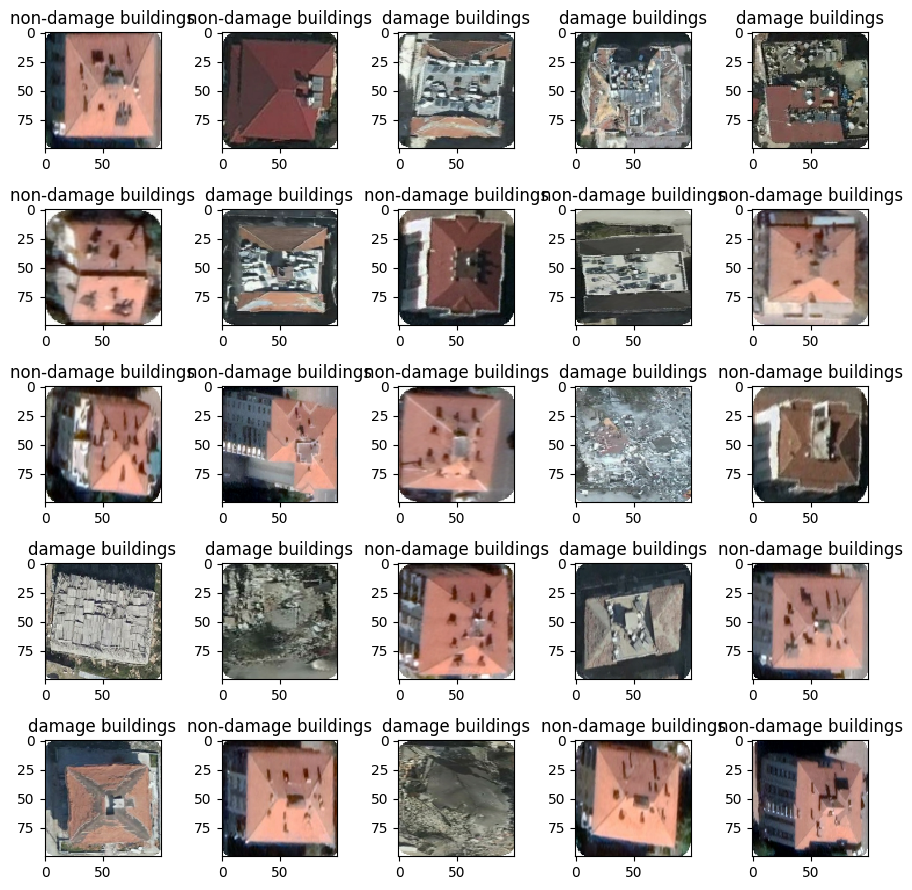

In [11]:
# change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9,9)

labels =  ['non-damage buildings' , 'damage buildings']

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()

## **Modelling**

In [12]:
img_rows, img_cols = 100, 100
channels = 3

In [13]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

### **Deep learning Model - 01**

In [14]:
def model_1():
    model = Sequential()
    model.add(Flatten(input_shape=(img_rows, img_cols, channels)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.summary()
    return model

- The model is constructed using a linear stack of layers.
- The model consists of the following layers:
  - **Flatten Layer:**
    - Converts multi-dimensional input data (an image) into a one-dimensional array.

  - **Dense Layer (with ReLU activation):**
    - Fully connected layer with 128 neurons.
    - Activation function: Rectified Linear Unit (ReLU).

  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 20% of neurons during training to prevent overfitting.

  - **Dense Layer (with Softmax activation):**
    - Final layer with 2 neurons, representing the classes in a binary-class classification task.
    - Activation function: Softmax, producing a probability distribution over the classes.


### **Deep learning Model - 02**

In [15]:
def model_2():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.summary()
    return model

- The model architecture is designed for image data and includes several convolutional and dense layers.
- The model comprises the following layers:

  - **Convolutional Layer (Conv2D):**
    - Applies 32 filters of size (3, 3) to the input image.
    - Activation function: Rectified Linear Unit (ReLU).

  - **MaxPooling Layer (MaxPooling2D):**
    - Performs max pooling with a pool size of (2, 2), reducing spatial dimensions.
    
  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 25% of neurons during training.
    
  - **Flatten Layer:**
    - Converts the 2D output from the previous layers into a 1D array.
    
  - **Dense Layer (with ReLU activation):**
    - Fully connected layer with 128 neurons.
    - Activation function: Rectified Linear Unit (ReLU).
    
  - **Dropout Layer:**
    - Regularization technique that randomly deactivates 50% of neurons during training.
    
  - **Dense Layer (with Softmax activation):**
    - Final layer with 2 neurons, representing classes in a binary-class classification task.
    - Activation function: Softmax, producing a probability distribution over the classes.

### **Model Execution - Model 01**

In [16]:
model = model_1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 128)               3840128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 3840386 (14.65 MB)
Trainable params: 3840386 (14.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
y_train = to_categorical(Y_train, 2)
y_test = to_categorical(Y_test, 2)

Model Building

In [18]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

hist = model.fit(X_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, y_test))

Epoch 1/100
15/15 - 3s - loss: 20.7507 - accuracy: 0.5363 - val_loss: 4.3559 - val_accuracy: 0.5766 - 3s/epoch - 170ms/step
Epoch 2/100
15/15 - 1s - loss: 3.3809 - accuracy: 0.5849 - val_loss: 0.8811 - val_accuracy: 0.6448 - 1s/epoch - 99ms/step
Epoch 3/100
15/15 - 1s - loss: 1.0328 - accuracy: 0.6663 - val_loss: 0.2685 - val_accuracy: 0.8942 - 1s/epoch - 92ms/step
Epoch 4/100
15/15 - 1s - loss: 0.5385 - accuracy: 0.7473 - val_loss: 0.4530 - val_accuracy: 0.7202 - 1s/epoch - 88ms/step
Epoch 5/100
15/15 - 1s - loss: 0.9343 - accuracy: 0.6778 - val_loss: 0.5186 - val_accuracy: 0.6302 - 1s/epoch - 93ms/step
Epoch 6/100
15/15 - 1s - loss: 0.5671 - accuracy: 0.6914 - val_loss: 0.4190 - val_accuracy: 0.8273 - 1s/epoch - 94ms/step
Epoch 7/100
15/15 - 2s - loss: 0.5961 - accuracy: 0.7332 - val_loss: 0.5603 - val_accuracy: 0.7019 - 2s/epoch - 138ms/step
Epoch 8/100
15/15 - 2s - loss: 0.4873 - accuracy: 0.7577 - val_loss: 0.3120 - val_accuracy: 0.9234 - 2s/epoch - 155ms/step
Epoch 9/100
15/15 - 

Evaluate the model

In [19]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0677
Train accuracy: 0.9661 

Test loss: 0.1255
Test accuracy: 0.9635


Plot history of learning

In [20]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

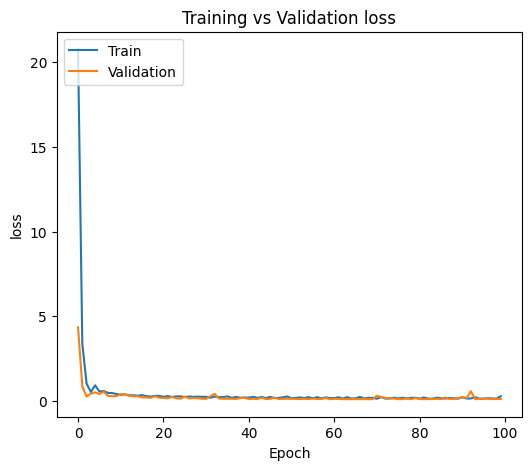

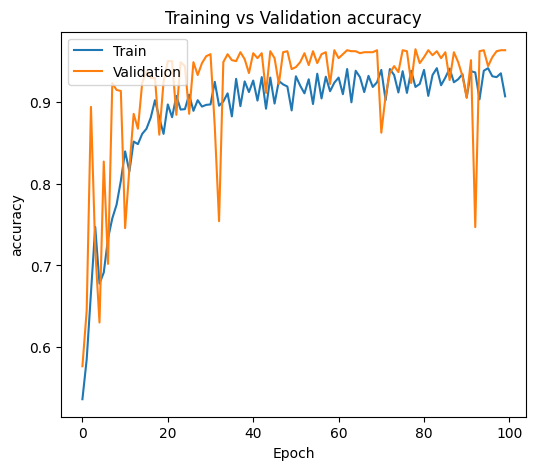

In [21]:
plot_hist(pd.DataFrame(hist.history))

Classification Report

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

26/26 [==============================] - 0s 11ms/step
The result of Kappa is : 0.926
The result of the classification report is: 
                        precision    recall  f1-score   support

non-damage buildings       0.98      0.95      0.97       474
    damage buildings       0.94      0.98      0.96       348

            accuracy                           0.96       822
           macro avg       0.96      0.97      0.96       822
        weighted avg       0.96      0.96      0.96       822



Confusion Matrix

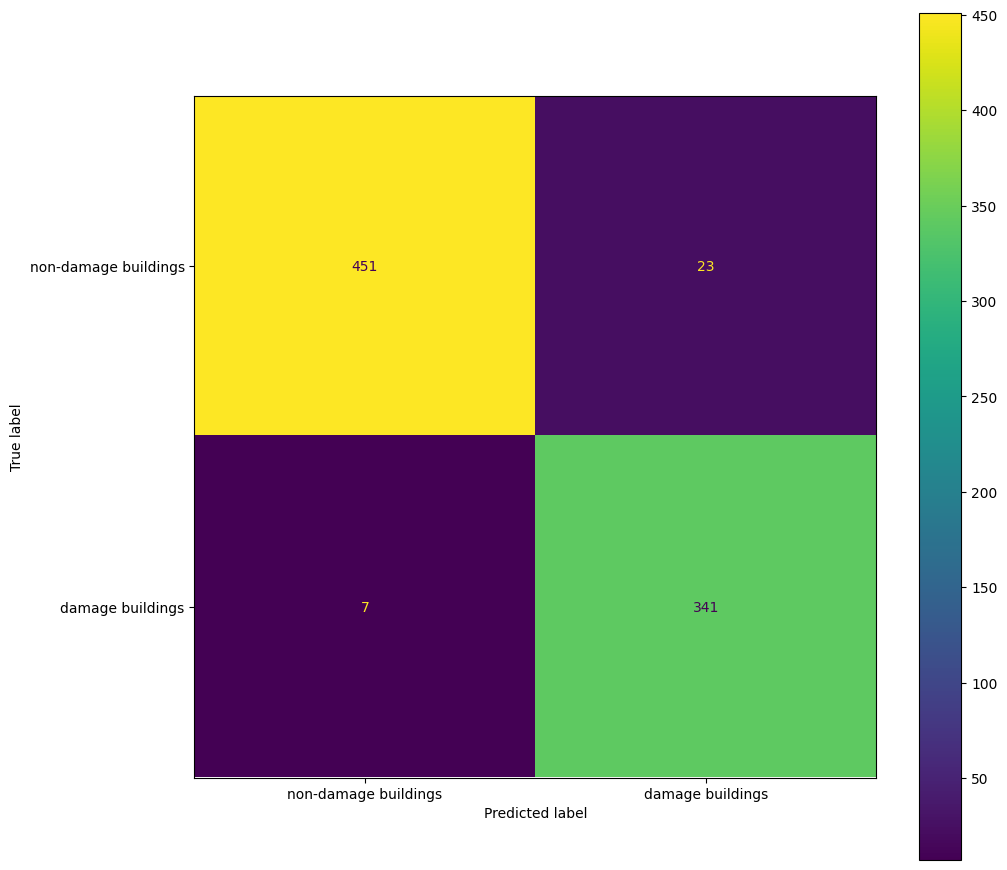

In [23]:
cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

### **Predictions from Model - 01**

In [24]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2/2 [==============================] - 0s 10ms/step


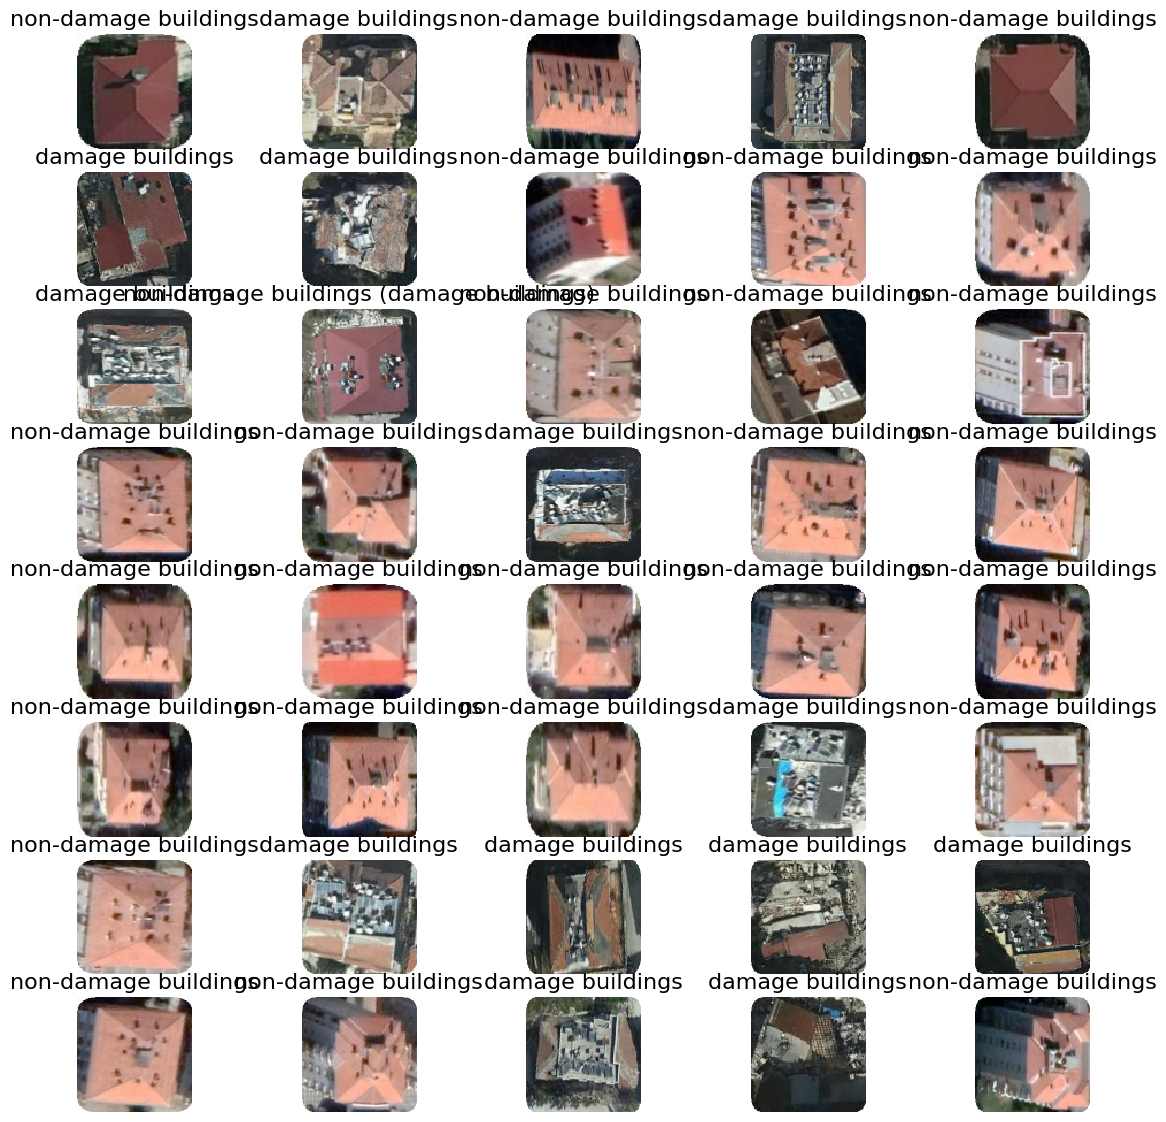

In [25]:
img_range = range(40)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(14,14), titles=titles)

### **Model Execution - Model 02**

In [26]:
model = model_2()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               9834624   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [27]:
y_train = to_categorical(Y_train, 2)
y_test = to_categorical(Y_test, 2)

Model Building

In [28]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')

hist = model.fit(X_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, y_test))

Epoch 1/100
15/15 - 25s - loss: 1.1566 - accuracy: 0.5911 - val_loss: 0.5903 - val_accuracy: 0.5803 - 25s/epoch - 2s/step
Epoch 2/100
15/15 - 25s - loss: 0.5147 - accuracy: 0.7420 - val_loss: 0.4210 - val_accuracy: 0.8455 - 25s/epoch - 2s/step
Epoch 3/100
15/15 - 23s - loss: 0.3656 - accuracy: 0.8397 - val_loss: 0.2067 - val_accuracy: 0.9416 - 23s/epoch - 2s/step
Epoch 4/100
15/15 - 26s - loss: 0.2955 - accuracy: 0.8893 - val_loss: 0.2276 - val_accuracy: 0.9112 - 26s/epoch - 2s/step
Epoch 5/100
15/15 - 23s - loss: 0.2740 - accuracy: 0.9039 - val_loss: 0.1644 - val_accuracy: 0.9465 - 23s/epoch - 2s/step
Epoch 6/100
15/15 - 27s - loss: 0.2616 - accuracy: 0.8935 - val_loss: 0.1680 - val_accuracy: 0.9428 - 27s/epoch - 2s/step
Epoch 7/100
15/15 - 23s - loss: 0.2091 - accuracy: 0.9337 - val_loss: 0.1457 - val_accuracy: 0.9513 - 23s/epoch - 2s/step
Epoch 8/100
15/15 - 27s - loss: 0.1974 - accuracy: 0.9420 - val_loss: 0.1387 - val_accuracy: 0.9526 - 27s/epoch - 2s/step
Epoch 9/100
15/15 - 22s 

Evaluate the model

In [29]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0103
Train accuracy: 1.0 

Test loss: 0.1109
Test accuracy: 0.9623


Plot history of learning

In [30]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

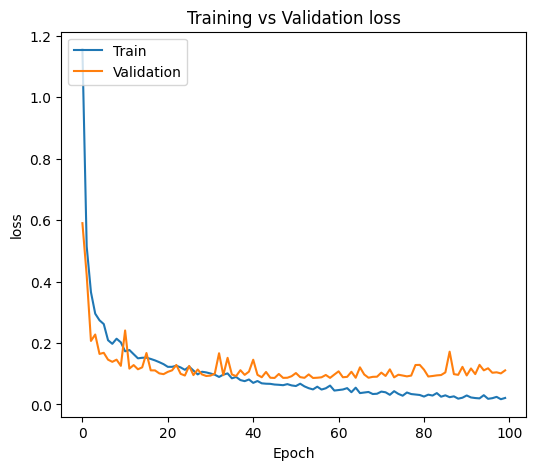

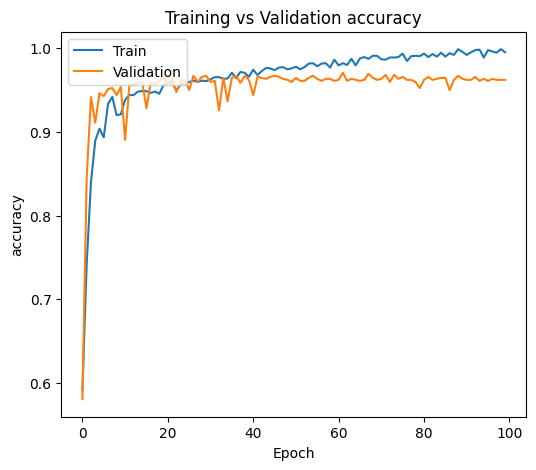

In [31]:
plot_hist(pd.DataFrame(hist.history))

Classification Report

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

26/26 [==============================] - 5s 185ms/step
The result of Kappa is : 0.923
The result of the classification report is: 
                        precision    recall  f1-score   support

non-damage buildings       0.98      0.95      0.97       474
    damage buildings       0.93      0.98      0.96       348

            accuracy                           0.96       822
           macro avg       0.96      0.96      0.96       822
        weighted avg       0.96      0.96      0.96       822



Confusion Matrix

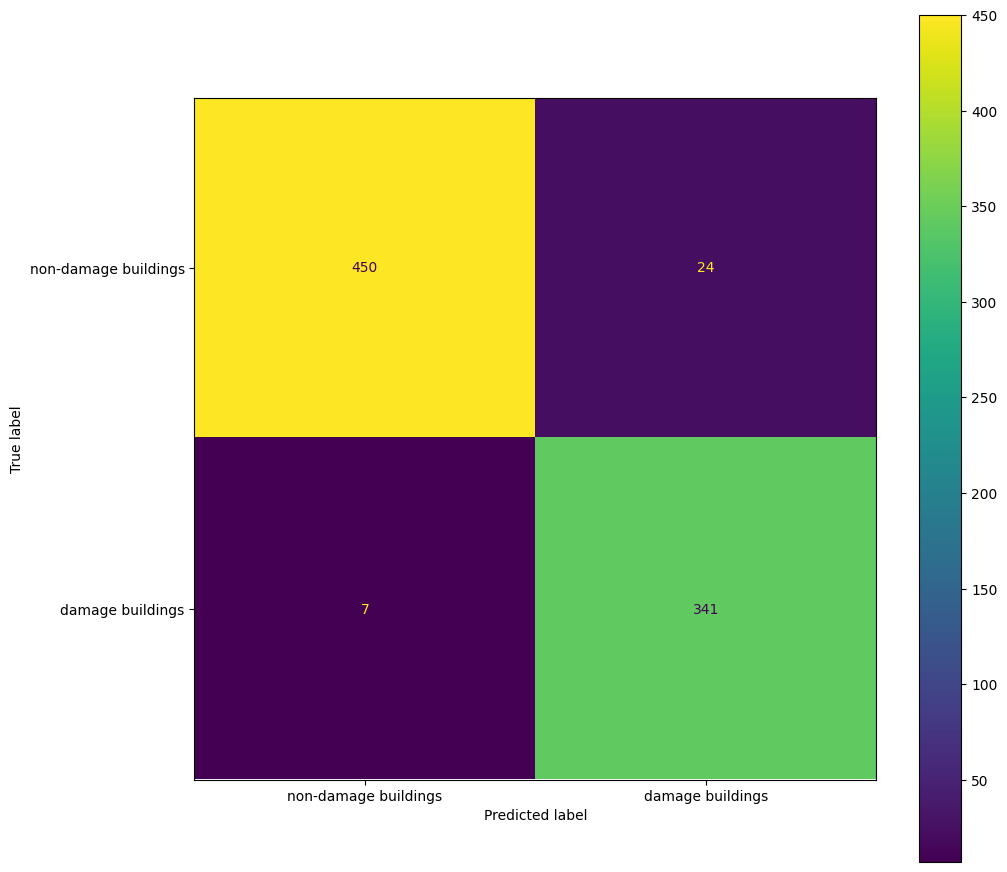

In [33]:
cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

### **Predictions from Model - 02**

In [34]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2/2 [==============================] - 0s 24ms/step


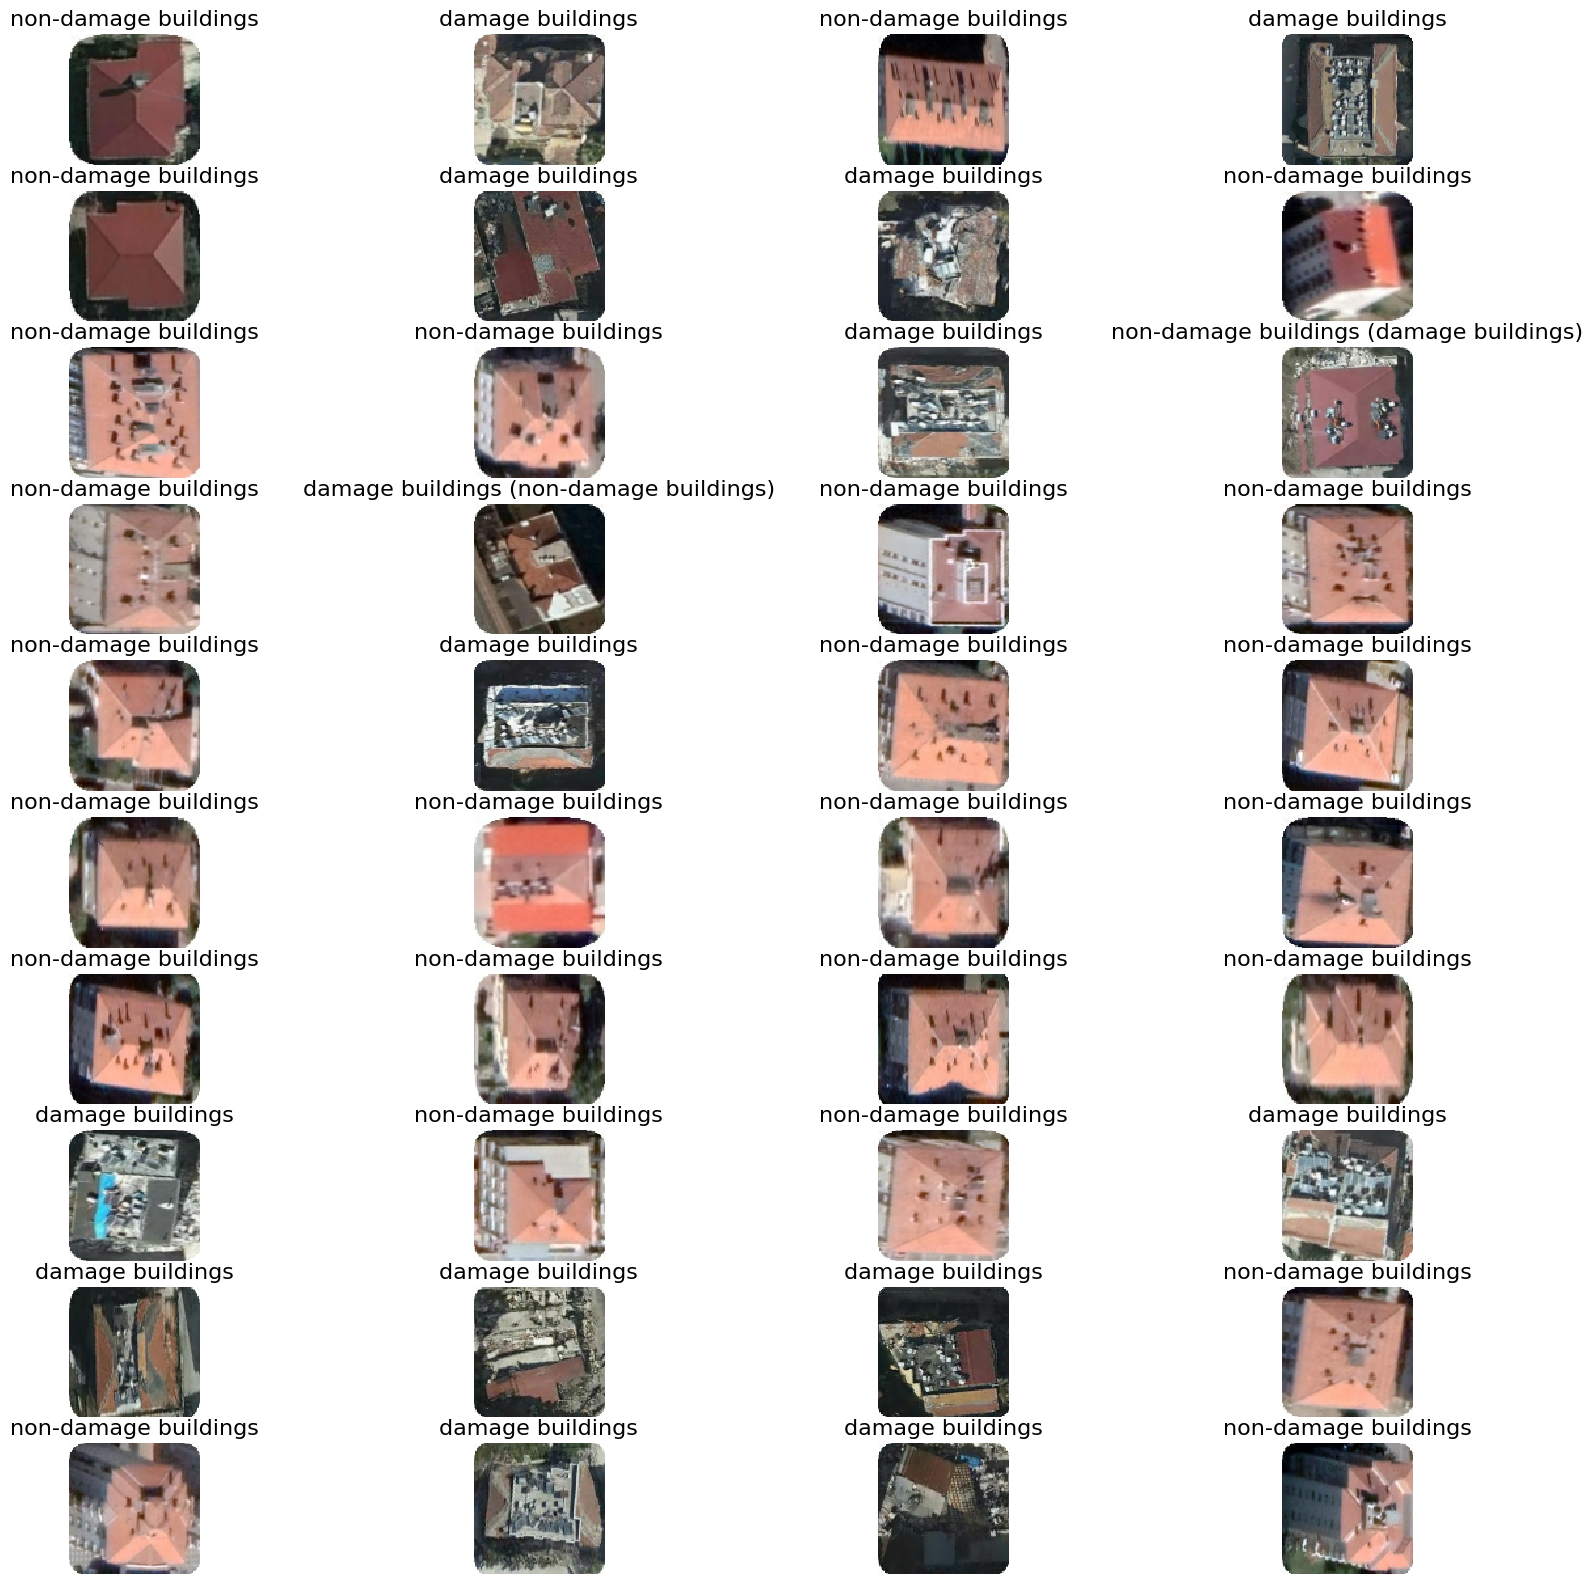

In [35]:
img_range = range(40)
imgs = X_test[img_range]
true_labels = [labels[np.argmax(x)] for x in y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [labels[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=4, figsize=(20,20), titles=titles)

### **Model Comparison**



*   CNN model 01 works better than the CNN model 02



### **Potential approaches to improve the model performances**



*   gather more data (More images)
*   try to get more clearer images

*   improve the pixel size of the images

*   devolop deep learning models with hyper parameter tuning
*   contionoues validation





